Test di Pearson Fedaia

In [7]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

os.getcwd()
os.chdir('C:/Users/aless/Desktop/lab idro/Fedaia')



In [8]:
data=pd.read_csv('massimi di precipitazione Fedaia.txt', sep=',')

In [9]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

In [13]:
data

,1h,3h,6h,12h,24h
Anno,,,,,
1919,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006,NaN,NaN,NaN,NaN,NaN
2007,12.6,32.2,43.8,48.6,57.0
2008,40.0,50.8,61.2,83.4,91.8


In [14]:
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [15]:
abs_m=pd.read_pickle("abs_m")
abs_mq=pd.read_pickle("abs_mq")
abs_mle=pd.read_pickle("abs_mle")

In [16]:
abs_m

,1h,3h,6h,12h,24h
a,12.659236,22.712616,32.271924,48.746973,67.396004
b,4.579033,5.155363,7.965556,13.646262,19.873747


In [17]:
abs_mq


,1h,3h,6h,12h,24h
a,31.740974,40.176971,48.436268,61.722084,76.85759
b,8.003639,11.459237,16.938335,25.040587,29.74419


In [18]:
abs_mle

,1h,3h,6h,12h,24h
a,13.001634,22.728162,31.960715,48.139302,66.168039
b,3.646094,5.338338,9.341875,16.063882,24.067697


In [19]:
def X2(data,abs_t,h,delta):                                       #definisco una funzione cge mi contiene i passaggi precedenti
    dt=data[h].dropna()
    #print(dt)                                                     # X2 (chi quadro) ha k-2 gradi di libertà, in questo caso abbiamo k=5 ovvero il numero degli intervalli
    lh=len(dt)
    #print("lh: ",lh)
    q=[delta*(i+1) for i in range(int(1/delta))]
    #print("q: ",q)
    rv=gumbel_r(loc=abs_t.at["a",h],scale=abs_t.at["b",h])
    ecdf = ECDF(dt)
    r=ecdf(rv.ppf(q))
    #print("r: ",r)
    o0=lh*r
    #print("o0: ",o0)
    o=o0-np.append([0],np.delete(o0,-1))
    #print("o: ",o)
    e=[delta*lh for i in range(len(r))]
    #print("e: ",e)
    return ((o-e)**2/e).sum() 

In [20]:
for  h in data.columns:
    print(h,": ",[X2(data,abs_m,h,0.2),X2(data,abs_mq,h,0.2),X2(data,abs_mle,h,0.2)])

1h :  [6.651162790697673, 162.23255813953486, 6.418604651162792]
3h :  [4.093023255813956, 152.69767441860463, 4.093023255813956]
6h :  [12.69767441860465, 67.34883720930236, 10.604651162790697]
12h :  [3.238095238095238, 17.761904761904763, 3.714285714285717]
24h :  [7.116279069767442, 8.279069767441857, 3.395348837209303]


In [33]:
a=[]
for  h in data.columns:
    a=a+[[X2(data,abs_m,h,0.2),X2(data,abs_mq,h,0.2),X2(data,abs_mle,h,0.2)]]
   
pd.DataFrame(a,index=["1h","3h","6h","12h","24h"],columns=["M","Mq","MLE"])

,M,Mq,MLE
1h,6.651163,162.232558,6.418605
3h,4.093023,152.697674,4.093023
6h,12.697674,67.348837,10.604651
12h,3.238095,17.761905,3.714286
24h,7.116279,8.279070,3.395349


In [34]:
best=DataFrame([abs_mle["1h"],                          # creo un dataframe dei parametri migliori
                abs_m["3h"],
                abs_mle["6h"],
                abs_m["12h"],
                abs_mle["24h"]]).T
                  
best

,1h,3h,6h,12h,24h
a,13.001634,22.712616,31.960715,48.746973,66.168039
b,3.646094,5.155363,9.341875,13.646262,24.067697


In [40]:
best.to_pickle("best_param")

In [41]:
best

,1h,3h,6h,12h,24h
a,13.001634,22.712616,31.960715,48.746973,66.168039
b,3.646094,5.155363,9.341875,13.646262,24.067697


In [36]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[4],100)

In [37]:
gb=pd.DataFrame([gumbel(t_rain,best,"1h"),
                 gumbel(t_rain,best,"3h"),
                 gumbel(t_rain,best,"6h"),
                 gumbel(t_rain,best,"12h"),
                 gumbel(t_rain,best,"24h")]).T                 # .T = trasposta
gb.index=t_rain
gb.columns=["1h","3h","6h","12h","24"]


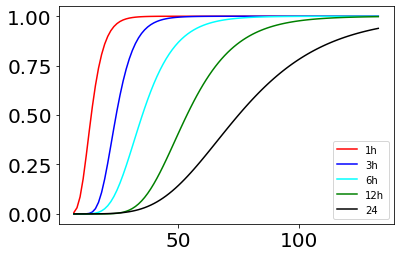

In [38]:
plt.rc('xtick', labelsize=20) #Questi sono comandi globali, impoastano il modo in cui verranno fatti i grafici in tutto il notebook
plt.rc('ytick', labelsize=20) #Questi sono comandi globali
ax=gb.plot(color=["red","blue","cyan","green","black"])


Text(0, 0.5, 'P[H<h]')

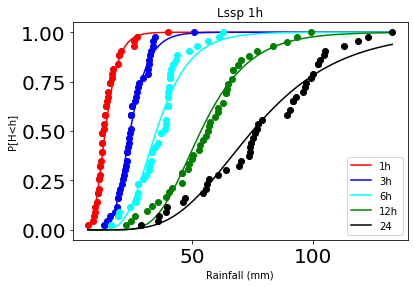

In [39]:
plt.rc('xtick', labelsize=20) #Quest  comandi globali
plt.rc('ytick', labelsize=20) #Questi sono comandi globali
ax=gb.plot(color=["red","blue","cyan","green","black"])

data1h=data["1h"].dropna()
ecdf1h = ECDF(data1h)
ax.plot(data1h,ecdf1h(data1h),'o',c="red")

data3h=data["3h"].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue")

data6h=data["6h"].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")

data12h=data["12h"].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="green")

data24h=data["24h"].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black")

ax.set_title('Lssp 1h')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')